# Linear Regression


In [223]:
# importing the required modules
#installs them if they are not yet there
%pip install numpy matplotlib seaborn pandas scikit-learn
import numpy as np
import matplotlib.pyplot as plt
# to get matplot figures render correctly in the notebook use:
%matplotlib inline
import pandas as pd
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


### Let's start by thanking the creators of the dataset that we will be using:

Cortez,Paulo, Cerdeira,A., Almeida,F., Matos,T., and Reis,J.. (2009). Wine Quality. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.

## Loading and Inspecting the Data

The first step in all machine learning problems is to load and inspect the data. First, let's load the data.   
The datafile `winequality-red.csv` is a ;-separated file that contains data of 1599 scientific meaurments of red wine. The file contains 11 columns which we will use as the features to describe the quality of the wine (last column).
Use the code snippet below to load the data into a Pandas object `data`:

In [224]:
#PATH to the training data
data = pd.read_csv('winequality-red.csv', sep=';')  # Makes Pandas objects


Inspect the data by looking at the types of data in the collumns.

In [225]:
#This prints the names and the datatypes of the collumns:
print(data.dtypes)
#This prints how many measurements of wines are in our database:
shape = data.shape
print(f'shape = {shape}')

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
shape = (1599, 12)


What we see is that that the 11 features are real numerical values (floats of 64 bits) and the quality of the wine has been rated with an integer mark.

Now, inspect the numbers by e.g. printing the shape of `data` and the first couple of rows (this is called the header).

In [226]:
# Let's take a look at the header of our dataset:
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [227]:
# Some statistics about our data:
print(data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

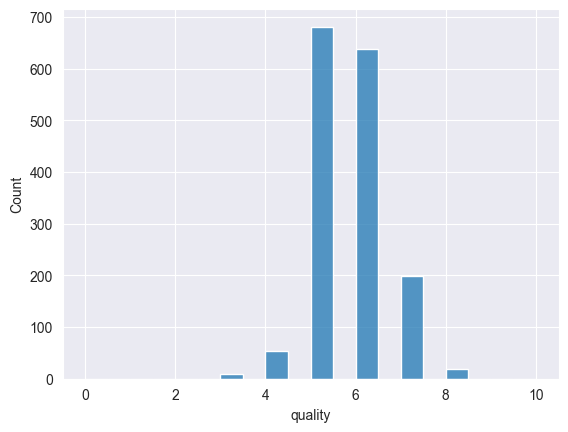

In [228]:
var = 'quality'
sns.histplot(data, x=var, binwidth=0.5, binrange=[0, 10]);

## Research question:

In this notebook we will not use all features. Our research question is:
__Is the quality of the wine related (correlated with) to the alcohol content?__

It is always good to create a plot to have a visulation of the data. In the next block of code plot the data, where you plot the alcohol conent the x-axis and the wine's quality on the y-axis.

Text(0.5, 1.0, 'Wine quality vs alcohol %')

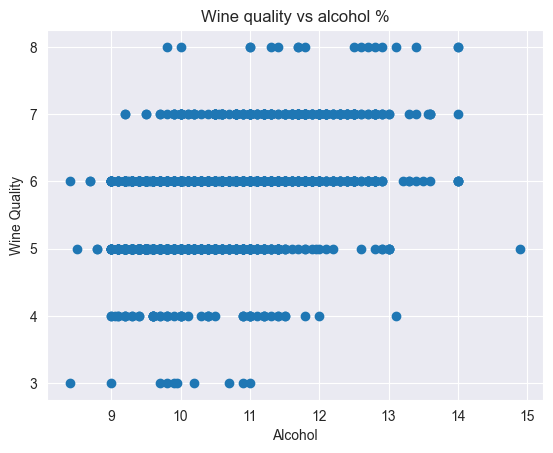

In [229]:
# Select the approriate collumns from our data structure:
ydata = data['quality']
xdata = data['alcohol']
#Plot them:
plt.scatter(xdata, ydata)
plt.ylabel('Wine Quality')
plt.xlabel('Alcohol')
plt.title('Wine quality vs alcohol %')

## Defining the model

This notebook is about linear regression. The corresponding model is given by (lecture notes eq. 2.6):
$$  \mathbf{\hat{y}} = \mathbf{X} \boldsymbol{\theta}    $$ 
with $\mathbf{X}$ the feature matrix , $\mathbf{\hat{y}}$ the predicted label vector and $\boldsymbol{\theta}$ the weight vector. 

The weight vector is found by minimizing the *loss* $L$. The loss is given by (lecture notes eq. 2.9):
$$  L = \frac{1}{M} \frac{1}{2} \left \| \mathbf{X} \boldsymbol{\theta}   - \textbf y \right \|^2 $$


#### Create the feature matrix and label vector

The feature matrix is represented by a 2D numpy array `X` composed of a column filled with ones (the bias) and column(s) with the feature(s). Also we need to define the label vector y as a 2D numpy array `y`.

In [230]:
# the number of samples M
M = len(data['alcohol'])
# the number of features N (excluding the bias)
N = 1
# define the feature matrix as a ( M x N+1 ) ndarray
X = np.column_stack(
    (np.ones(M), data['alcohol']))  #this is a nice numpy possibility: np.column_stack((np.ones(M), xdata))
# define the label vector as a (M x 1) ndarray
y = np.array(data['quality']).reshape(-1, 1)
# define some intital guess for the theta vector as a (N+1 x 1) ndarray
theta = np.random.rand(N + 1, 1)
print(y.shape, X.shape, theta.shape)  # Should result (1599, 1) (1599, 2) (2,1)|
#If you later doubt about the quality of the fit, try to repeat from the top but setup explict linear data:
# y[:,0]=xdata*2+1

(1599, 1) (1599, 2) (2, 1)


#### Implement the loss function
Next, define a function that computes the loss given the feature matrix, the label vector and the weight vector.

| function                    | description                                                                                                     |
|-----------------------------|-----------------------------------------------------------------------------------------------------------------|
| `compute_loss(X, y, theta)` | This function takes the feature matrix `X`, label vector `y` and the weight vector `theta` and returns the loss |


In [231]:
def compute_loss(X, y, theta):
    """
    computes the loss of a linear regression model

    Parameters
    ----------
    X : (M x N+1) ndarray (with M the number of samples and N the number of features excluding the bias)
        The feature matrix including the bias in the first column
    y : (M x 1) ndarray
        label vector
    theta : (N+1 x 1) ndarray
        The weight vector inlcuding the bias

    Returns
    -------
    loss : float
        The loss

    """

    M = len(y)

    loss = 1 / M * 1 / 2 * np.sum(np.square(X @ theta - y))
    return loss

In [232]:
# test the function with some value for theta
theta = np.ones(N + 1)
loss = compute_loss(X, y, theta)
print(loss)


28202.85075594123


## Train the Model

The next step is to train the model. We use the gradient descent algortihm for this. The weight vector is updated according to:
$$  \boldsymbol{\theta} \rightarrow \boldsymbol{\theta} - \eta \frac{\mathrm{d} L}{\mathrm{d} \boldsymbol{\theta}} $$
where $\eta$ is a *hyperparameter* that allows to tune the rate of descent, and the gradient defined as (lecture notes eq. 2.10):

$$ \frac{\mathrm{d} L}{\mathrm{d} \boldsymbol{\theta}}  = \frac{1}{M} \mathbf{X}^T  \left (  \mathbf{X}  \boldsymbol{\theta} - \textbf y \right )     $$

Therefore we need to implement the following functions:

| function                             | description                                                                                                                                                                                                        |
|--------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `gradient(X, y, theta)`              | This function takes the feature matrix `X`, label vector `y` and the weight vector `theta` and returns the gradient of the loss w.r.t. the weight(s)                                                               |
| `train(X, y, theta, eta, num_iters)` | This function takes the feature matrix `X`, label vector `y`, the weight vector `theta`, hyperparameter `eta` and the number of iteration steps `num_iters`, and returns the weight vector the minimises the loss. |

In [233]:
def gradient(X, y, theta):
    """
    computes the gradient of a linear regression model

    Parameters
    ----------
    X : (M x N+1) ndarray (with M the number of samples and N the number of features excluding the bias)
        The feature matrix including the bias in the first column
    y : (M x 1) ndarray
        label vector
    theta : (N+1 x 1) ndarray
        The weight vector inlcuding the bias

    Returns
    -------
    grad : (N+1 x 1) ndarray
        The gradient of the loss w.r.t the weight vector theta

    """

    M = len(y)
    grad = 1 / M * X.T @ (X @ theta - y)

    return grad

In [234]:
# test the function for some value of theta
theta = np.ones(N + 1)
grad = gradient(X, y, theta)
print(grad)

[[ 4.76397749  5.16397749  5.16397749 ...  6.36397749  5.56397749
   6.36397749]
 [49.24532416 53.41451741 53.41451741 ... 65.92209714 57.58371065
  65.92209714]]


Next, define the function `train()` that implements the gradient descent algorithm.

In [235]:
def train(X, y, theta, eta=0.01, num_iters=10000):
    """
    Implements the gradient descent algorithm for a linear regression model

    Parameters
    ----------
    X : (M x N+1) ndarray (with M the number of samples and N the number of features excluding the bias)
        The feature matrix including the bias in the first column
    y : (M x 1) ndarray
        label vector
    theta : (N+1 x 1) ndarray
        The weight vector inlcuding the bias
    eta : float, optional
        The rate. The default is 0.01.
    num_iters : int, optional
        Number of iterations that is performed. The default is 5500.

    Returns
    -------
    theta : (N+1 x 1) ndarray
        The optimised weight vector    
    loss : (num_iters,) ndarray
        The loss at each iteration
    """

    loss = np.zeros(num_iters)

    for ii in range(num_iters):
        theta = theta - eta * gradient(X, y, theta)
        loss[ii] = compute_loss(X, y, theta)

    return (theta, loss)

We can now train the model.

In [236]:
# intialize theta to some value
theta = np.random.rand(N + 1, 1)
# train the model
theta, loss = train(X, y, theta, eta=0.01)
# print the computed weight vector
print(f'weigths: {theta}')

weigths: [[1.40311839]
 [0.40564867]]


First have a (critical) look at how the loss changed during the training by plotting the loss versus the iteration number:

Text(0, 0.5, 'Loss')

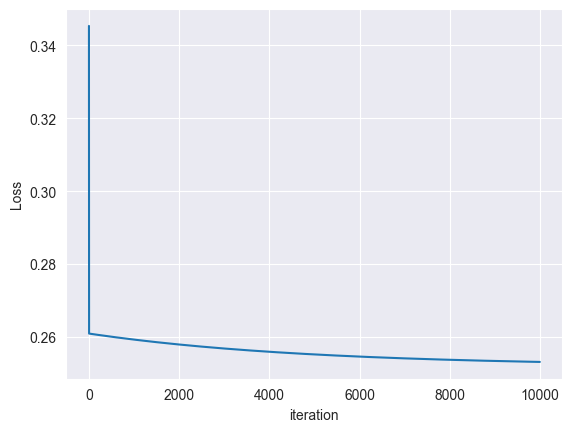

In [237]:
# create a plot of the loss versus the interation number

plt.plot(loss)
plt.xlabel('iteration')
plt.ylabel('Loss')

## Evaluate the model

To evaluate the model, we need a function `predict(X, theta)` that predicts the label `y` given some new values of the features `X`. Implement this function below.

In [238]:
def predict(X, theta):
    """
    Predicts the label y given features X for a linear regression model with weights theta

    Parameters
    ----------
    X : (M x N+1) ndarray (with M the number of samples and N the number of features excluding the bias)
        The feature matrix including the bias in the first column 
    theta : (N+1 x 1) ndarray
        The weight vector inlcuding the bias

    Returns
    -------
    y_pred : (M x 1) ndarray
        The predicted labels    
    """

    y_pred = X @ theta

    return y_pred

Test the function by plotting the original data, but now including a line-plot of the quality prediction versus alcohol levels baed on 50 predictions in the range from 0 to 18.


Text(0.5, 1.0, 'Wine quality vs alcohol %')

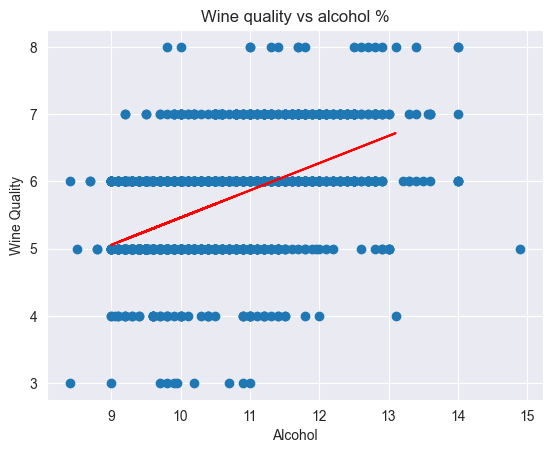

In [239]:
# create a feature matrix X
NUM_SAMPLES = 50
bias = np.ones(NUM_SAMPLES)
features = np.linspace(0, 18, num=NUM_SAMPLES)
X_pred = X[1:NUM_SAMPLES]
# predict the corresponding labels
y_pred = predict(X_pred, theta)
# plot the original data as a scatter plot and the fitted model by a red line
plt.scatter(xdata, ydata)
plt.plot(X_pred[:, 1], y_pred, "r")
plt.ylabel('Wine Quality')
plt.xlabel('Alcohol')
plt.title('Wine quality vs alcohol %')

## Minimizing the loss by direct computation
Rather than using the gradient descent method, linear regression allows to directly compute the weight that minimizes the loss. The expression is given by (see reader eq. 2.14):

$$ \boldsymbol{\theta}  = \left ( \mathbf{X}^T  \mathbf{X} \right )^{-1} \mathbf{X}^T \textbf y $$

The term $\left ( \mathbf{X}^T  \mathbf{X} \right )^{-1} \mathbf{X}^T$ is the so-called pseude-inverse of $\mathbf{X}$. 

In the cell below you define a function `solve(X, y)` that applies this equation to compute the weights.

***TIP: computing the pseudo-inverse can be numerically instable resulting in high nummerical errors. Therefore you rather use the build-in numpy function `np.linalg.pinv(X.T)` to compute the pseudo-inverse rather than computing it following the eqaution above.***


In [240]:
def solve(X, y):
    """
    Computes the weights by direct computation 

    Parameters
    ----------
    X : (M x N+1) ndarray (with M the number of samples and N the number of features excluding the bias)
        The feature matrix including the bias in the first column
    y : (M x 1) ndarray
        label vector
    
    Returns
    -------
    theta : (N+1 x 1) ndarray
        The optimised weight vector    
    """
    # theta = np.linalg.pinv(X.T)@y this command causes an error
    theta = np.linalg.pinv(X) @ y
    return theta

In [241]:
# use the function solve() to compute weights and compare to 
# the results obtained by the gradient descent method
old_theta = theta
theta = solve(X, y)
print(theta)
print(theta - old_theta)
print(f"Loss of Gradient descent: {compute_loss(X, y, old_theta)} \n Loss of solver: {compute_loss(X, y, theta)}")

[[1.87497489]
 [0.36084177]]
[[ 0.4718565 ]
 [-0.04480691]]
Loss of Gradient descent: 0.2531429841503644 
 Loss of solver: 0.25199201283572853


## Linear regression of "non-linear" data

We have observed a weak linear relation between the label (quality) and the feature (alcohol). We can possibily improve our regression model by adding 'manufactured' features to the feature matrix. One way to do this is to add polynomial features. If we have only one orginal feature ($x_1$), then the polynomials that can be added as feature are:

$$ 1, x_1, x_1^2, x_1^3, x_1^4, ... \text{ etc}$$

Let do this for the quality versus alcohol model.

We will try to fit this data using polynomials. To this end we need to build a feature matrix `X` that contains the polynomials of the feature up to some degree.

In the cell below you define a function `polynomials(x, degree)` that computes the feature matrix `X` upto the specified degree.

In [242]:
# write a function that computes the feature matrix X

def polynomials(x, degree):
    """
    Computes the feature matrix X composed of all polynomials of x upto order degree
    and includes the bias
    
    Parameters
    ----------
    x : 1D ndarray of length M (with M the number of samples) 
        features  
    degree : integer >= 0
        the highest poly degree that is included

    Returns
    -------
    X : (  M, degree + 1 ) ndarray
        The feature matrix    
    """
    X = np.ones(len(x))
    for deg in range(1, degree + 1):
        X = np.column_stack((X, x ** deg))
    return X


In [243]:
# test the function by creating a feature matrix from the data up to degree 3
X = polynomials(np.linspace(0, 10, 11), 3)
print(X)

[[   1.    0.    0.    0.]
 [   1.    1.    1.    1.]
 [   1.    2.    4.    8.]
 [   1.    3.    9.   27.]
 [   1.    4.   16.   64.]
 [   1.    5.   25.  125.]
 [   1.    6.   36.  216.]
 [   1.    7.   49.  343.]
 [   1.    8.   64.  512.]
 [   1.    9.   81.  729.]
 [   1.   10.  100. 1000.]]


The next step is to fit the data (use the function `solve()`). Trys different degrees.

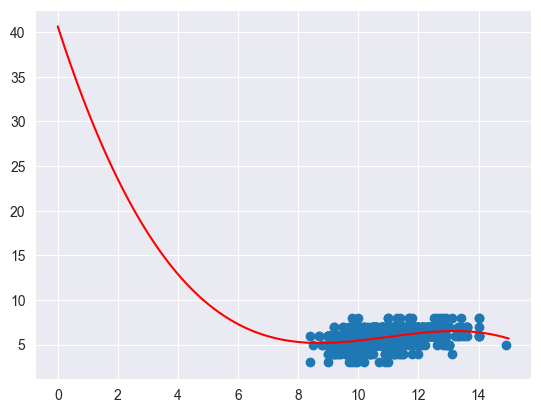

In [244]:
# perform a fit and plot the result

# prepare X 
degree = 3
X = polynomials(xdata, degree)

# compute the weights
theta = solve(X, y)

# Create a feature matrix X for the prediction
NUM_SAMPLES = 1000
features = np.linspace(0, 15, num=NUM_SAMPLES)
X_pred = polynomials(features, degree)

# predict the corresponding labels
y_pred = predict(X_pred, theta)

# plot the original data and the predictions
plt.scatter(xdata, ydata, label='data')
plt.plot(features, y_pred, 'r', label='model')


As you have seen, the data is *under-fitted* if the number of degrees is too low. If the number of degrees is too high you will have *over-fitting*. The challenge is to have a good trade-off. 

In the next cell you will make a plot of the loss (y-axis) against the polynomial degree (x-axis) (degrees between 1 and 12).

Text(0, 0.5, 'loss')

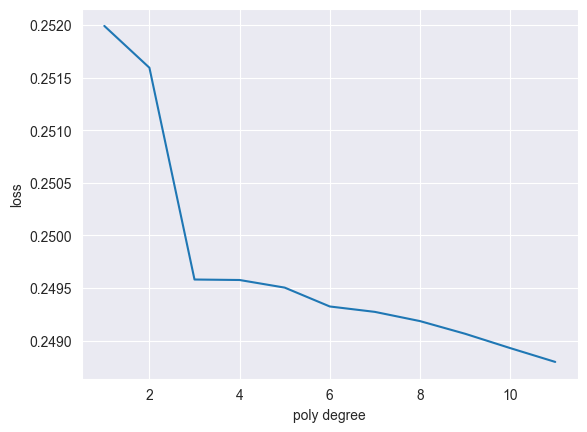

In [245]:
# make a plot of the loss as function of the polynomial degree

degrees = list(range(1, 12))
losses = []
for deg in degrees:
    # prepare the data
    X = polynomials(xdata, deg)

    # solve to get the weights
    theta = solve(X, y)

    # compute the loss
    loss = compute_loss(X, y, theta)
    losses.append(loss)

plt.plot(degrees, losses)
plt.xlabel('poly degree')
plt.ylabel('loss')

The curve above suggest to use a high degree in order to make the losses as small as possible. However most likely that solution will not generalize well to another sample of the data (*over-fitting*). So next, you will use a test data set to check how well the model performs. The procedure is as follows:
- split your dataset in a train and a test set
- use the train data set to fit the model
- use the model to compute the loss of both train and test data sets
- repeat for different degrees
- finally make a plot of the loss for both train and test data sets as function of the degree
- inspect the plot and determine the degree that gives the best results

Text(0, 0.5, 'loss')

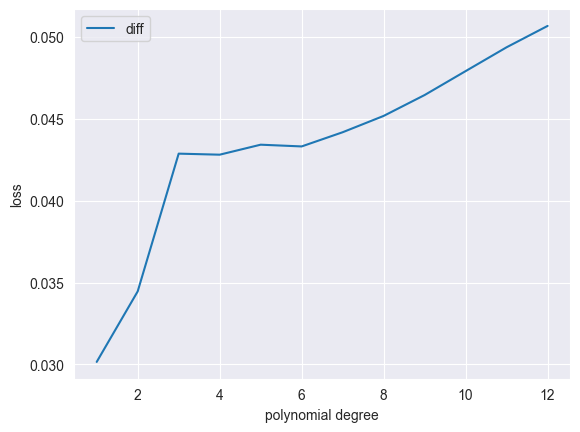

In [246]:
# carry out the procedure described above

# Split data in train (70%) & test (30%) sets:
M = len(xdata)
split_idx = int(np.floor(M*0.7))
x_train = xdata[:split_idx]
y_train = ydata[:split_idx]

x_test = xdata[split_idx:]
y_test = ydata[split_idx:]

# sets up models from degree 1 to 13.
degrees = list(range(1, 13))
losses_train = []
losses_test = []

for deg in degrees:
    # prepare the data train set
    X = polynomials(x_train, deg)
    y = y_train

    # solve to get the weights
    theta = solve(X, y)

    # compute loss and store
    loss = compute_loss(X, y, theta)
    losses_train.append(loss)

    # prepare the data test set
    X = polynomials(x_test, deg)
    y = y_test

    # compute loss and store
    loss = compute_loss(X, y, theta)
    losses_test.append(loss)

#Convert list to numpy arrays:
ltr = np.asarray(losses_train, dtype=np.float32)
lte = np.asarray(losses_test, dtype=np.float32)
diff = abs(ltr - lte) #Why abs? 

#plt.plot(degrees, losses_train, label='train')
#plt.plot(degrees, losses_test, label='test')
plt.plot(degrees, diff, label='diff')
plt.legend()
plt.xlabel('polynomial degree')
plt.ylabel('loss')
#plt.ylim(-0.5, 0.5)



## Regularisation
The problem with the higher order polynomials in the example above can be reduced by using regularisation. The weights can be computed directly using (reader eq. 2.25):

$$ \boldsymbol\theta = (\mathbf{X}^T\mathbf{X}+\lambda  M \mathbf{I})^{-1}\mathbf{X}^T  \textbf{y} $$

Implement the function `solve_reg(X, y, labda)` in the cell below. (I know it is spelled lambda, but python has this name already claimed...) Note that you cannot use the `np.linalg.pinv()` function. However this is not a problem in this case as the addition of the regularisation term causes the problem to be more numerically stable. 

In [247]:
def solve_reg(X, y, labda):
    """
    Computes the weights by direct computation 

    Parameters
    ----------
    X : (M x N+1) ndarray (with M the number of samples and N the number of features excluding the bias)
        The feature matrix including the bias in the first column
    y : (M x 1) ndarray
        label vector
    labda: float
        regularisation hyperparameter
    
    Returns
    -------
    theta : (N+1 x 1) ndarray
        The optimised weight vector    
    """
    M = len(y)
    I = np.identity(X.shape[1], dtype=float)
    I[0, 0] = 0.  # to exclude the bias from the regularisation
    theta = np.linalg.inv(X.T@X + labda*M*I)@X.T@y
    return theta


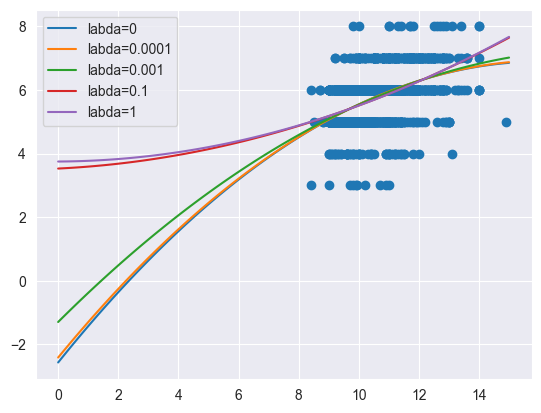

In [254]:
# perform a fit and plot the result
# include results for a few different labda's

degree = 2

for labda in [0, 0.0001, 0.001, 0.1, 1]:

    # prepare X and y of your training set
    X = polynomials(x_train, degree)
    y = y_train

    # compute the weights
    if labda == 0:
        theta = solve(X, y)
    else:
        theta = solve_reg(X, y, labda)

    # Create a feature matrix X for the prediction
    NUM_SAMPLES = 100
    features = np.linspace(0, 15, num=NUM_SAMPLES)
    X_pred = polynomials(features, degree)

    # predict the corresponding labels
    y_pred = predict(X_pred, theta)

    # plot the predictions
    plt.plot(features, y_pred, label=f'labda={labda}')

# plot the original training data as a scatter plot 
plt.scatter(xdata, ydata)
plt.legend()

Finally make a new plot of the loss versus the degree of both train and test data set, but now for a proper choice of the regularisation hyperparameter labda.

(0.0, 0.1)

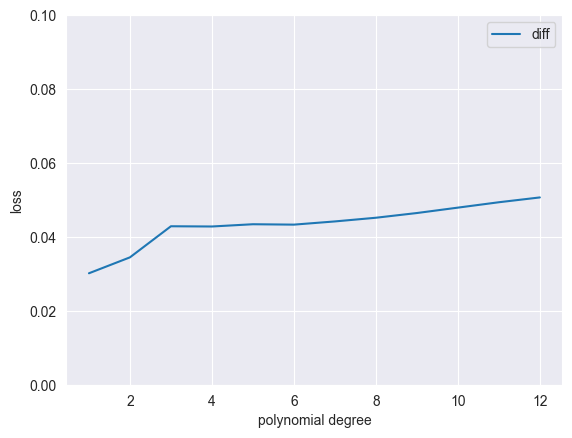

In [255]:
# create a plot of the loss versus degree of both train and test data set

degrees = list(range(1, 13))
labda = 0.0001
losses_train = []
losses_test = []

for deg in degrees:
    # prepare the data train set
    X = polynomials(x_train, deg)
    y = y_train

    # solve to get the weights
    theta = solve(X, y)

    # compute loss and store
    loss = compute_loss(X, y, theta)
    losses_train.append(loss)

    # prepare the data test set
    X = polynomials(x_test, deg)
    y = y_test

    # compute loss and store
    loss = compute_loss(X, y, theta)
    losses_test.append(loss)

ltr = np.asarray(losses_train, dtype=np.float32)
lte = np.asarray(losses_test, dtype=np.float32)
diff = ltr - lte
plt.plot(degrees, abs(diff), label='diff')
#plt.plot(degrees, losses_train, label='train')
#plt.plot(degrees, losses_test, label='test')
plt.legend()
plt.xlabel('polynomial degree')
plt.ylabel('loss')
plt.ylim(0, 0.1)

## Using sklearn
Next we will explore the linear_regression using the machine learning module *sklearn* (see this website for more info: https://scikit-learn.org/stable/).

To keep it simple you will perform two fits on the data set quality versus alcohol.
- using the sklearn class `LinearRegression`. 
- using the sklearn class `Ridge` for regularised regression.

In both cases use a poly degree of 8 and plot the results in one single plot together with the data. 

This part has already been made for you. Play with it and compare the results with previous solutions!

In [ ]:
# import from the module the linear regression model
from sklearn.linear_model import LinearRegression, Ridge

In [ ]:

degree = 8

# create instances of the regression and of the regularised regression model
reg = LinearRegression(fit_intercept=False)  # we have the bias included in X, so no sepearte intercept is required.
reg_ridge = Ridge(alpha=0.001, fit_intercept=False)

# prepare the data train set
X = polynomials(xdata_train, degree)
y = ydata_train

print(X.shape, y.shape)

# train the model
reg.fit(X, y)
reg_ridge.fit(X, y)

# Create a feature matrix X for the prediction
NUM_SAMPLES = 100
features = np.linspace(0, 15, num=NUM_SAMPLES)
X_pred = polynomials(features, degree)

# predict the corresponding labels
y_pred = reg.predict(X_pred)
y_pred_ridge = reg_ridge.predict(X_pred)

# plot the predictions
plt.plot(features, y_pred, label='not regularised')
plt.plot(features, y_pred_ridge, label='regularised')

# plot the original data 
plt.scatter(xdata_train, ydata_train, c='k', label='data')
plt.legend()
plt.ylim(0, 10)


### __The 3EC students may stop here (if they want). The last bit is compulsory for the 5EC variant of the course!__

## Construct a multivariable linear regression model

Besides the feature alcohol, there are 10 other features in the database. Using the techniques that you have learned so far, construct a linear model which uses all features. You can build the models yourselfs with the linear algebra rules or use the library scikit-learn.


In [ ]:
# Split the database in 20% test data and 80% train data (from the top, ie the first 20% of the samples are for testing only!)

...

# Build linear regession model


# Make predictions on the test set

# Calculate the root-mean-square error on test set:



Can you determine which features are most important with respect to the quality of the wine?


## The end